In [1]:
import smbus
import matplotlib.pyplot as plt

from meerkat import mcp9808, parser

In [2]:
i2c = smbus.SMBus(1)

In [3]:
mcp = mcp9808.MCP9808(bus=i2c)

In [4]:
mcp.get_status()
mcp.print_status()

Configuration Register: None
Upper Temperature: None
Lower Temperature: None
Critical Temperature: None
Manufacturer: 84
Device ID: 4
Device Revision: 0


In [5]:
mcp.get_temp()

25.25

In [6]:
print(mcp.device.to_json(indent=4))

{
    "accuracy": "+/-0.25 (typical) C",
    "active": null,
    "bus": "<SMBus object at 0x6e7e7a28>",
    "calibration_date": null,
    "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor",
    "dtype": null,
    "error": null,
    "manufacturer": "Microchip",
    "name": "MCP9808",
    "precision": "0.0625 C maximum",
    "state": null,
    "units": "Degrees Celcius",
    "urls": "https://www.microchip.com/datasheet/MCP9808",
    "version_hw": "0.1",
    "version_sw": "0.1"
}


In [7]:
print(mcp.writer.to_json(indent=4))

{
    "accuracy": null,
    "bytes": null,
    "case_sensitive_header": false,
    "comment": "#",
    "delimiter": ",",
    "description": null,
    "device": {
        "accuracy": "+/-0.25 (typical) C",
        "active": null,
        "bus": "<SMBus object at 0x6e7e7a28>",
        "calibration_date": null,
        "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor",
        "dtype": null,
        "error": null,
        "manufacturer": "Microchip",
        "name": "MCP9808",
        "precision": "0.0625 C maximum",
        "state": null,
        "units": "Degrees Celcius",
        "urls": "https://www.microchip.com/datasheet/MCP9808",
        "version_hw": "0.1",
        "version_sw": "0.1"
    },
    "double_quote": true,
    "dtypes": null,
    "encoding": "utf-8",
    "escape_char": "\\",
    "format": null,
    "hash": null,
    "header": [
        "sample_id",
        "temperature_C"
    ],
    "licenses": null,
    "line_terminator": "\n",
    "me

In [8]:
mcp.get(description='MCP9808_example', n=15)

[['MCP9808_example', 1, 25.25],
 ['MCP9808_example', 2, 25.25],
 ['MCP9808_example', 3, 25.25],
 ['MCP9808_example', 4, 25.25],
 ['MCP9808_example', 5, 25.25],
 ['MCP9808_example', 6, 25.25],
 ['MCP9808_example', 7, 25.25],
 ['MCP9808_example', 8, 25.25],
 ['MCP9808_example', 9, 25.25],
 ['MCP9808_example', 10, 25.25],
 ['MCP9808_example', 11, 25.25],
 ['MCP9808_example', 12, 25.25],
 ['MCP9808_example', 13, 25.25],
 ['MCP9808_example', 14, 25.25],
 ['MCP9808_example', 15, 25.25]]

### File Save Test
Ambient temperature is approximately 23 degrees C

In [9]:
mcp.writer.path = 'MCP9808_example.csv'

In [10]:
mcp.write(description='MCP9808_example_2', n=15)

In [11]:
m, df = parser.csv_resource(mcp.writer.path)

In [12]:
df.head()

,std_time_ms,description,sample_n,temperature,datetime64_ns
0,2019-01-02 18:22:30.253096,MCP9808_example_2,1,25.25,2019-01-02 18:22:30.253096
1,2019-01-02 18:22:30.255386,MCP9808_example_2,2,25.25,2019-01-02 18:22:30.255386
2,2019-01-02 18:22:30.257220,MCP9808_example_2,3,25.25,2019-01-02 18:22:30.257220
3,2019-01-02 18:22:30.259252,MCP9808_example_2,4,25.25,2019-01-02 18:22:30.259252
4,2019-01-02 18:22:30.263631,MCP9808_example_2,5,25.25,2019-01-02 18:22:30.263631


In [13]:
m

{'accuracy': None,
 'bytes': None,
 'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'description': None,
 'device': {'accuracy': '+/-0.25 (typical) C',
  'active': None,
  'bus': '<SMBus object at 0x6e7e7a28>',
  'calibration_date': None,
  'description': '+/-0.5 degrees Celcius maximum accuracy digital temperature sensor',
  'dtype': None,
  'error': None,
  'manufacturer': 'Microchip',
  'name': 'MCP9808',
  'precision': '0.0625 C maximum',
  'state': None,
  'units': 'Degrees Celcius',
  'urls': 'https://www.microchip.com/datasheet/MCP9808',
  'version_hw': '0.1',
  'version_sw': '0.1'},
 'double_quote': True,
 'dtypes': None,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': None,
 'hash': None,
 'header': ['description', 'sample_n', 'temperature'],
 'licenses': None,
 'line_terminator': '\n',
 'media_type': 'text/csv',
 'name': 'MCP9808',
 'null_sequence': 'NA',
 'path': 'MCP9808_example_csv',
 'precision': None,
 'quote_char': '"',
 'schema': None,
 'she

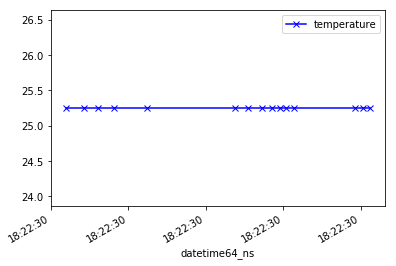

In [14]:
df[['datetime64_ns', 'temperature']].plot(x='datetime64_ns',
                                          style='-xb');

In [15]:
dt = df.datetime64_ns[len(df)-1]-df.datetime64_ns[0]
dtt = dt.seconds + dt.microseconds / 10**6
print('Sample Rate: {:.4f} Hz'.format(len(df)/dtt))

Sample Rate: 382.0488 Hz
